# Tutorial on Unit 1

### Problem 1. Data I/O and analysis: climate time series

This problem consists of reading, displaying, and analysing climate data. The data file for this exercise was downloaded from: https://ourworldindata.org/ and contains the following information:


- Annual $\rm CO_2$ emission per capita (in tons), see file: **co-emissions-per-capita.csv**

https://github.com/wbandabarragan/computational-physics-1/blob/main/old-notes/assignments/data_sets/co-emissions-per-capita.csv


In [2]:
# First, make sure you import the necessary libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.optimize as opt
import os
import scipy.constants as const 
import scipy.stats as st

#### Write Python functions that: 

#### (a) Read in the **co-emissions-per-capita.csv** file, and place the data into a pandas dataframe. Inspect the data tables to check how they are organised.

In [3]:
# We create the function to read the csv file

def read_file(file_name):
    """
    This function read a csv file an 
    place the data into a pandas dataset
    
    input: file_name
    output: pandas dataframe 
    """
    data = pd.read_csv(file_name, sep = ",")
    return data

In [4]:
# Define the path/filename 
file_name = "./data/co-emissions-per-capita.csv"

# call the function
df1 = read_file(file_name) 

In [5]:
# Inspect the data 
df1.head()

,Entity,Code,Year,Annual CO2 emissions (per capita)
0,Afghanistan,AFG,1949,0.0019
1,Afghanistan,AFG,1950,0.0109
2,Afghanistan,AFG,1951,0.0117
3,Afghanistan,AFG,1952,0.0115
4,Afghanistan,AFG,1953,0.0132


In [6]:
# describe in your own words how the data is organised.

# print the headers
print(df1.keys())

Index(['Entity', 'Code', 'Year', 'Annual CO2 emissions (per capita)'], dtype='object')


#### (b) Create 3 new data objects (time series) that contain only the information (rows) for Ecuador, Colombia, and Peru. **Hint:** Use the **data.loc** function to locate the respective rows based on the country name.

In [7]:
# Now, create a function to slice the data according to the Entity we are interested in.
def country_data(data, entity):
    """
    This function gets specific information from 
    a pandas dataframe depending on the country 
    you are interested in.
    """
    data_entity = data.loc[data["Entity"] == entity]
    
    return data_entity

In [8]:
# Call the function for the three countries

# For Ecuador
ecuador_data = country_data(df1, "Ecuador")

# For Colombia
colombia_data = country_data(df1, "Colombia")

# For Peru
peru_data = country_data(df1, "Peru")

#### (c) Inspect the data, compare the time ranges (in years), and adjust the data series (if necessary) so that each object/series contains information for the same number of years. Hint: Use conditionals to select only the overlapping time periods.

In [9]:
# Inspect the data 

print(ecuador_data.shape, colombia_data.shape, peru_data.shape)

(104, 4) (100, 4) (137, 4)


We can notice that the data of the three countries do not have the same dimensions, which means we need to get just the overlaping time periods. 

For this, we first identify the shorter time period:

In [10]:
# Chech the maximum and minimum year 
print(ecuador_data.min(), ecuador_data.max())
print(colombia_data.min(), colombia_data.max())
print(peru_data.min(), peru_data.max())

Entity                               Ecuador
Code                                     ECU
Year                                    1917
Annual CO2 emissions (per capita)     0.0137
dtype: object Entity                               Ecuador
Code                                     ECU
Year                                    2020
Annual CO2 emissions (per capita)     2.7086
dtype: object
Entity                               Colombia
Code                                      COL
Year                                     1921
Annual CO2 emissions (per capita)      0.0045
dtype: object Entity                               Colombia
Code                                      COL
Year                                     2020
Annual CO2 emissions (per capita)      1.9355
dtype: object
Entity                                 Peru
Code                                    PER
Year                                   1884
Annual CO2 emissions (per capita)    0.0012
dtype: object Entity                    

We can notice that the three time periods end at 2020, but they do not start at the same point. The shorter time period startes at 1921, which corresponds to Colombia. So is this time period we will use to adjust the other two time periods.

In [11]:
# Define a global minimum year using the minimum year of the shortest time period
min_year = 1921

# Define the function
new_data = lambda data: data[data["Year"]>= min_year]

# Call the function 
ecuador_df2 = new_data(ecuador_data)
colombia_df2 = new_data(colombia_data)
peru_df2 = new_data(peru_data)

#print(ecuador_df2)
#print(colombia_df2)
#print(peru_df2)

#### (d) Now that all the series cover the same time period in years, calculate the average and standard deviation of the annual $\rm CO_2$ emission per capita (in tons) of these 3 countries. Create and export (in CSV format) a new pandas data frame that contains 6 columns:

- Year

- $\rm CO_2$ emission in Ecuador

- $\rm CO_2$ emission in Colombia

- $\rm CO_2$ emission in Peru

- Average $\rm CO_2$ emission (of these 3 countries)

- Standard deviation of the $\rm CO_2$ emission (of these 3 countries)

In [12]:
#  Define a function to obtain a specific column and pass it to a numpy array.
data_array = lambda data, key: np.array(data[key])

In [13]:
# First, let's put Year into an np array. Since the years are the same for the three countries, 
# we can choose anyone
year_array = data_array(ecuador_df2, "Year")

In [14]:
# Now, let's put into numpy arrays the CO2 emissions for each country.

# Ecuador 
co2_ecuador = data_array(ecuador_df2, "Annual CO2 emissions (per capita)")

# Colombia 
co2_colombia = data_array(colombia_df2, "Annual CO2 emissions (per capita)")

# Peru 
co2_peru = data_array(peru_df2, "Annual CO2 emissions (per capita)")

In [15]:
# Let's find the average and standard deviation of the annual  CO2
# emission per capita (in tons) of these 3 countries.

# define the function
def average(*co2_array):
    """
    This function calculates the average CO2 emissions per capita 
    and  standard deviation given the CO2 emissions per capita of a country.
    Input: co2_array
    Output: mean_co2, stdv
    """
    
    # Concatenate the input arrays
    new_co2_array = np.array(co2_array)
    
    # Calculate the average along the axis 0 (rows)
    mean_co2 = np.mean(new_co2_array, axis = 0)
    
    # Compute the standard deviation as well
    stdv = np.std(new_co2_array, axis = 0)
    
    return mean_co2, stdv

In [16]:
# Call the function
mean_co2, stdv = average(co2_ecuador, co2_colombia, co2_peru)

# chech the data you obtained
#print(mean_co2)
#print(stdv)

In [17]:
# Now, let's create a pandas dataframe with the requested data

new_df = pd.DataFrame({'Year': year_array, 'C02 emission in Ecuador': co2_ecuador,
                      'C02 emission in Colombia': co2_colombia, 
                      'CO2 emission in Peru': co2_peru, 'Average CO2 emission': mean_co2, 
                      'Standard deviation of CO2 emissions': stdv})

#new_df

# Let's put it into a .csv file 
new_df.to_csv('./data/co2_new_df.csv', ",", float_format = '{:.4e}'.format)


#### (e) Make a labeled, high-quality plot of the annual $\rm CO_2$ emission per capita (in tons) versus time, including the lines for each country, the line for the average with y-error bars equal to the $1\sigma$ standard deviations calculated above. Briefly comment on the results.

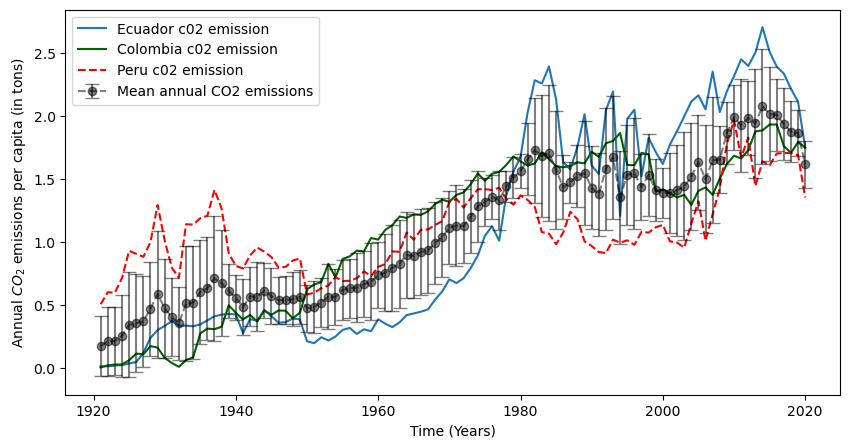

In [18]:
# Plotting

# Begin env
plt.figure(figsize=(10, 5))

plt.plot(year_array, co2_ecuador, color = "C10", linestyle = "-", 
         label = "Ecuador c02 emission")

plt.plot(year_array, co2_colombia, color = "darkgreen", linestyle = "-",
         label = "Colombia c02 emission")

plt.plot(year_array, co2_peru, color = 'r', linestyle = '--',
         label = "Peru c02 emission")

plt.errorbar(year_array, mean_co2,yerr = stdv, color = 'black', linestyle = '--',
             fmt = 'o', capsize = 5, label = 'Mean annual CO2 emissions', 
             alpha = 0.5)

plt.ylabel(r'Annual $CO_2$ emissions per capita (in tons)')
plt.xlabel(r'Time (Years)')
plt.legend(loc = "best")
plt.show()

In [19]:
# Comment the results



### Problem 2. Regression, interpolation, $\chi^2$ minimisation: climate time series

Consider the following data files, which contain climate data:

- Annual $\rm CO_2$ emission per capita (in tons), see file: **co-emissions-per-capita.csv**

https://github.com/wbandabarragan/computational-physics-1/blob/main/old-notes/assignments/data_sets/co-emissions-per-capita.csv

- Sea temperature anomaly with respect to the 1961-1990 (in $\rm ^{\circ}C$), see file: **temperature-anomaly.csv**

https://github.com/wbandabarragan/computational-physics-1/blob/main/old-notes/assignments/data_sets/temperature-anomaly.csv

Both were downloaded from: https://ourworldindata.org/.

Write Python functions that: 

(a) Read in the **co-emissions-per-capita.csv** file, select the "World" data, and place it into a pandas data frame. **Hint:** Follow the same procedure as for problem 1, but select the rows labeled with "World". Make a labeled figure of $\rm CO_2$ emission per capita (in tons) versus time (in years).


(b) Read in the **temperature-anomaly.csv** file, select the rows corresponding to the global anomaly, i.e., those labeld with "Global". Make a labeled figure of the temperature anomaly (in $\rm ^{\circ}C$) versus time (in years), including symmetric y-errors for the temperature anomaly. **Hint:** to calculate the symmetric $2\sigma$ y-errors, you can read the columns "Upper bound (95% CI)" and "Lower bound (95% CI)" and then average them.


(c) Check if the data frames created in (a) and (b) cover the same time period in years. If not, use conditionals to select only the overlapping time periods, so that both data frames cover the same time ranges. Create and export (in CSV format) a new pandas data frame that contains 4 columns:

- Year

- World $\rm CO_2$ emission

- Global temperature anomaly

- $2\sigma$ error in temperature anommaly


(d) Make a labeled scatter plot (using markers) of the temperature anomaly (including the $2\sigma$ y-error bars) versus $\rm CO_2$ emission. How monotonic and/or linear is the relation between the two variables?


(e) Make a plot comparing the (linear?) fits to the data using two different methods:

- Carry out a least-mean-square regression to fit a single function (line?) to the whole data set, and report the resulting equation and figure.


- Carry out a $\chi^2$ minimisation (including the y-error bars), and report the resulting equation and figure.


- Briefly comment (in 3-4 lines maximum), are the fitted regressions above representative of the data?


(f) Now, try to improve the fits. The temperature anomaly data are noisy as a result of climate variability.


- Make it smoother by: interpolating it into a finer x-axis and applying a Gaussian filter. Show the comparison in a figure.


- Re-do the analysis in (e), using the smoothed data for the temperature anomaly.


- Is a single line a good model? If not, carry out a piece-wise analysis if necessary and report the new equations and plots.

#### (a) Read in the **co-emissions-per-capita.csv** file, select the "World" data, and place it into a pandas data frame. **Hint:** Follow the same procedure as for problem 1, but select the rows labeled with "World". Make a labeled figure of $\rm CO_2$ emission per capita (in tons) versus time (in years).

In [20]:
# Call the function.
# You can also use the dataframe we imported in part 1 problem 1.
file_name2 = "./data/co-emissions-per-capita.csv"

df_2 = read_file(file_name2)

In [21]:
# Get only the Entity = "World" data 

data_world = df_2.loc[df_2["Entity"] == "World"]

data_world.head()

,Entity,Code,Year,Annual CO2 emissions (per capita)
23546,World,OWID_WRL,1750,0.0125
23547,World,OWID_WRL,1760,0.0128
23548,World,OWID_WRL,1770,0.0150
23549,World,OWID_WRL,1780,0.0169
23550,World,OWID_WRL,1790,0.0206


In [22]:
# Put time "Year" and "CO2 emissions" into numpy arrays so we can
# plot them later.

years_data = np.array(data_world["Year"])
co2_world = np.array(data_world["Annual CO2 emissions (per capita)"])


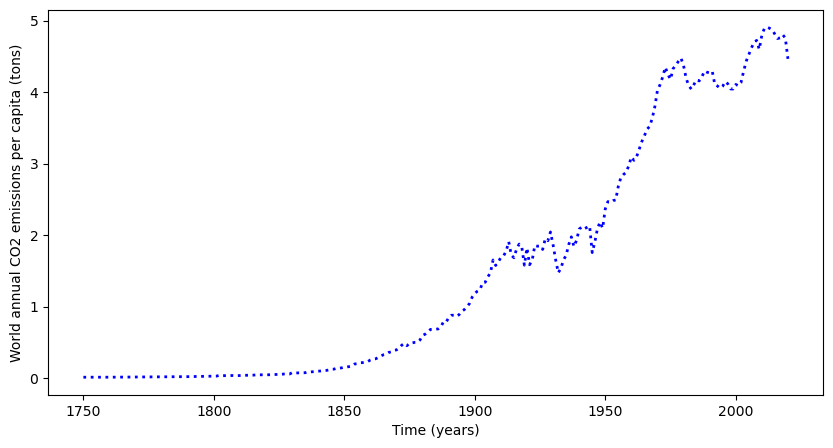

In [23]:
# Plotting 

plt.figure(figsize = (10, 5))

plt.plot(years_data, co2_world, color = 'blue', linestyle = ':', lw = 2)

plt.xlabel("Time (years)")
plt.ylabel("World annual CO2 emissions per capita (tons)")


plt.show()

#### (b) Read in the **temperature-anomaly.csv** file, select the rows corresponding to the global anomaly, i.e., those labeld with "Global". Make a labeled figure of the temperature anomaly (in $\rm ^{\circ}C$) versus time (in years), including symmetric y-errors for the temperature anomaly. **Hint:** to calculate the symmetric $2\sigma$ y-errors, you can read the columns "Upper bound (95% CI)" and "Lower bound (95% CI)" and then average them.

In [24]:
# Call the function 

file_name3 = "./data/temperature-anomaly.csv"

df_3 = read_file(file_name3)

In [25]:
# Check the data 

#print(temp_data)

# Get only the "Global" labeled data

temp_data = df_3.loc[df_3["Entity"] == "Global"]

#print(gtemp_data)

In [26]:
# Before we proceed to elaborate on the plot, we need to compute the errors
# using the "Upper Bound" and the "Lower Bound" as suggested.

# First, let's place that columns into numpy arrays as well as the median temperature

up_bound = np.array(temp_data["Upper bound (95% CI)"])
low_bound = np.array(temp_data["Lower bound (95% CI)"])
median_temp = np.array(temp_data["Median temperature anomaly from 1961-1990 average"])

#print(up_bound)
#print(low_bound)
#print(median_t)

Now that we have the data of interest into numpy arrays, we proced to calculate the symmetric $2\sigma$ y-errors: 

$$ error = \frac{d_1 + d_2}{2}$$

where $d_1 = \big|Ubound - median\big|$ and $d_2 = \big|median - Lbound\big|$

In [27]:
# Compute d1, d2 and the error

def error(up_bound, low_bound, median):
    """
    This function computes the symmetric 
    2-sigma error for the temperature anomaly
    Input: up_bound, low_bound, median
    Output: error
    """
    
    # Compute d1 and d2
    d1 = abs(median - up_bound)
    d2 = abs(median - low_bound)
    
    # compute the errors
    error = (d1 + d2)/2
    
    return error

In [28]:
# call the function 

error_array = error(up_bound, low_bound, median_temp)

#print(error_array)

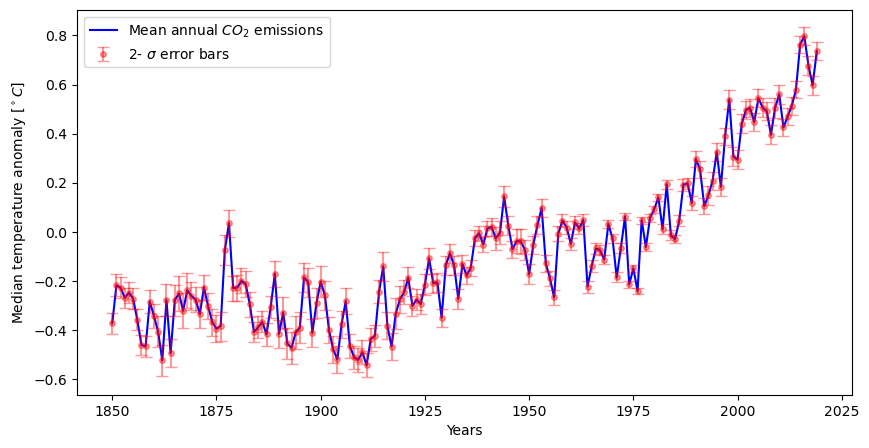

In [29]:
# Plotting 

years_global = np.array(temp_data["Year"])

#print(g_years)
# Env

plt.figure(figsize=(10, 5))

plt.plot(years_global, median_temp, linestyle='-', color = "blue", label = r'Mean annual $CO_2$ emissions')

plt.errorbar(years_global, median_temp,yerr = error_array, color = 'red', linestyle = ' ', marker = 'o', 
            markersize = '4', capsize = 4,label = r'2- $\sigma$ error bars', alpha = 0.4)


plt.xlabel('Years')
plt.ylabel(r"Median temperature anomaly [$^\circ C$]")
plt.legend()

plt.show()

#### (c) Check if the data frames created in (a) and (b) cover the same time period in years. If not, use conditionals to select only the overlapping time periods, so that both data frames cover the same time ranges. Create and export (in CSV format) a new pandas data frame that contains 4 columns:

- Year

- World $\rm CO_2$ emission

- Global temperature anomaly

- $2\sigma$ error in temperature anommaly

In [30]:
# check min and max for the two year arrays 

print(np.min(years_data), np.max(years_data))
print(np.min(years_global), np.max(years_global))

1750 2020
1850 2019


We can notice that the time series do not cover the same range of years. So we need to adjust them.

In [31]:
# Adjust the data 

min1_year = 1850
max1_year = 2019

new_world_df = data_world.loc[data_world["Year"] >= min1_year]

new_world_df = new_world_df.loc[new_world_df["Year"] <= max1_year]

#print(new_world_df)
#print(temp_data)


In [32]:
# Create the .csv file

# We need to put all the required data into numpy arrays. We already have Years array,
# Global temperature anomaly, 2-sigma error. 

# Then, let's get co2 emissions data

world_co2_emission = np.array(new_world_df['Annual CO2 emissions (per capita)'])

#print(world_co2_emission)

print(years_global.shape, world_co2_emission.shape, median_temp.shape, error_array.shape)

(170,) (170,) (170,) (170,)


In [33]:
# Now, let's create a pandas dataframe with the requested data


new_df2 = pd.DataFrame({'Year': years_global, 'World CO2 emissions': world_co2_emission,
                      'Global temperature anomaly': median_temp,
                        '2-sigma error in temperature anomaly': error_array})

#print(new_df2)

# Let's put it into a .csv file 

new_df2.to_csv('./data/CO2_temperature.csv', ",", float_format = '{:.4e}'.format)

In [34]:
new_df2.to_csv("./CO2_temperature.csv", ",", float_format = '{:.4e}'.format)

#### (d) Make a labeled scatter plot (using markers) of the temperature anomaly (including the $2\sigma$ y-error bars) versus $\rm CO_2$ emission. How monotonic and/or linear is the relation between the two variables?

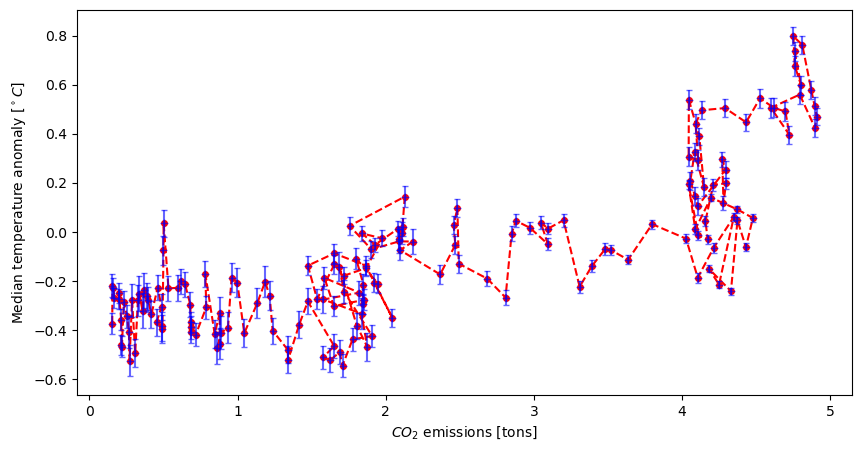

In [35]:
# We could import the data file we created earlier, but since we already 
# have the arrays of that data file, we will use them.

#Env 

plt.figure(figsize=(10, 5))

#plt.plot(world_co2_emission, median_temp, linestyle=':', color='red')
plt.plot(world_co2_emission, median_temp, linestyle='--', color='red', marker = 'o', markersize = 4)
plt.errorbar(world_co2_emission, median_temp, yerr = error_array, linestyle = ' ',
            marker = "+", capsize = 2, color = "blue", alpha = 0.6)

plt.xlabel(r"$CO_2$ emissions [tons]")
plt.ylabel(r"Median temperature anomaly [$^\circ C$]")

plt.show()

In [36]:
# To see how monotonic and linear is the relation, we must compute the following coeficients

# Let's calculate these coefficients

# 1. Spearman coeffiecient
sp = st.spearmanr(world_co2_emission, median_temp)

# 2. Pearson coefficient
pe = st.pearsonr(world_co2_emission, median_temp)

print("Spearman:\n", sp)
print("Pearson:\n", pe)

Spearman:
 SpearmanrResult(correlation=0.7980445762483592, pvalue=8.508817495111514e-39)
Pearson:
 (0.8038965800282324, 9.388213186059067e-40)


Based on this results,  I can say that the relation is monotonic, but not completely linear. This could be because, as we will see later, we may need more than one line to fit this data, because of the anomaly. 

#### (e) Make a plot comparing the (linear?) fits to the data using two different methods:

- Carry out a least-mean-square regression to fit a single function (line?) to the whole data set, and report the resulting equation and figure.


- Carry out a $\chi^2$ minimisation (including the y-error bars), and report the resulting equation and figure.


- Briefly comment (in 3-4 lines maximum), are the fitted regressions above representative of the data?

In [37]:
# Sort the data 

# get the indices of the sorted array
indices_sort = np.argsort(world_co2_emission)

# sort the arrays
sorted_x = world_co2_emission[indices_sort]
sorted_y = median_temp[indices_sort]
sorted_errors = error_array[indices_sort]


<Figure size 1000x500 with 0 Axes>

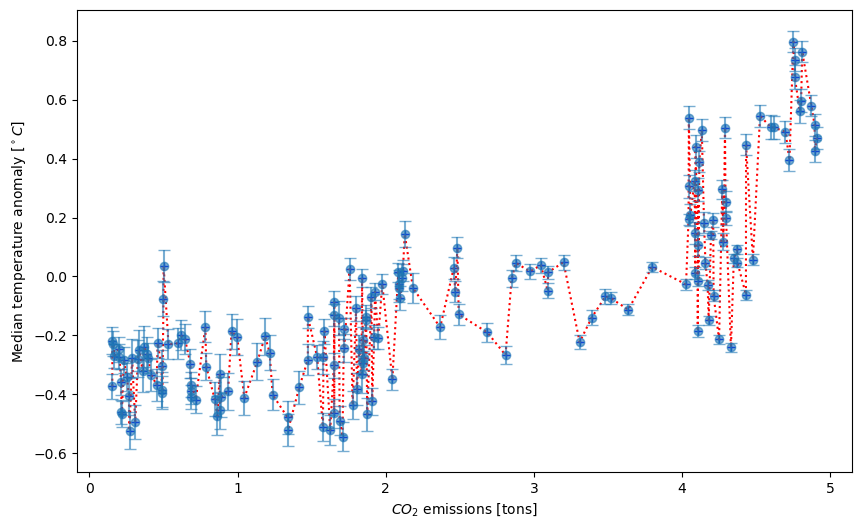

In [38]:
#Env 

plt.figure(figsize=(10, 5))

plt.figure(figsize=(10, 6))

plt.plot(sorted_x, sorted_y, linestyle=' ', color = 'blue', marker = '+')
plt.plot(sorted_x, sorted_y, linestyle=':', color='red')
plt.errorbar(sorted_x, sorted_y, yerr = sorted_errors, linestyle = ' ',
           fmt = 'o', alpha = 0.6, capsize = 4)

plt.xlabel(r"$CO_2$ emissions [tons]")
plt.ylabel(r"Median temperature anomaly [$^\circ C$]")

plt.show()

In [39]:
# Least Squares Method 
def fit_model1(x_values, m, b):
    """
    """
    y_values = m * x_values + b
    
    return y_values

In [40]:
# Perform Least Squares Method Regression 
coef, cova = opt.curve_fit(fit_model1, sorted_x, sorted_y)

print(coef)

[ 0.15859006 -0.45188365]


In [41]:
# Compute the fitted values
fitted_mean_temp1 = fit_model1(sorted_x, *coef)

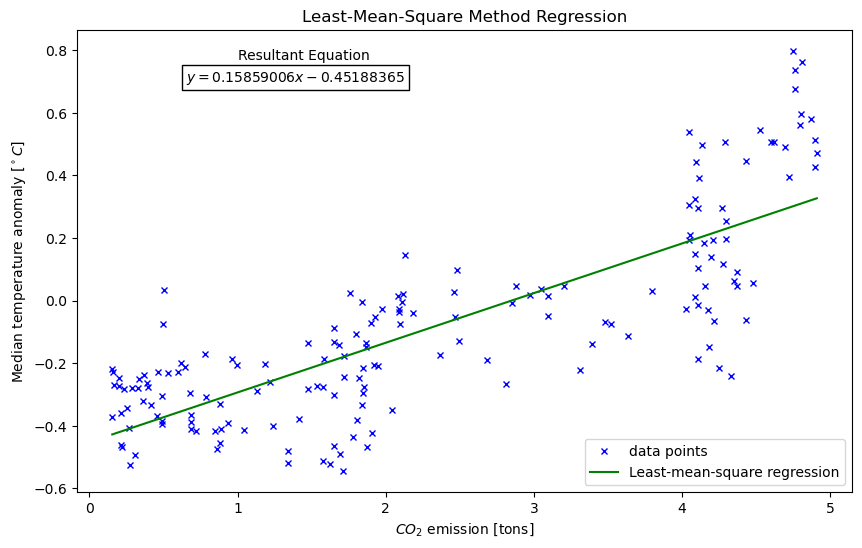

In [42]:
#Env 

plt.figure(figsize=(10, 6))

plt.plot(sorted_x, sorted_y, linestyle=' ', color = 'blue', marker = 'x', markersize = 4, label = 'data points')
plt.plot(sorted_x, fitted_mean_temp1, linestyle='-', color='green', label = 'Least-mean-square regression')
#plt.errorbar(sorted_x, sorted_y, yerr = sorted_errors, linestyle = ' ',
 #          marker = "+", color = "red", alpha = 0.6)

bbox_props = dict(boxstyle='square,pad=0.3', facecolor='white', edgecolor='black', linewidth=1)
plt.text(1, 0.77, "Resultant Equation", fontsize=10, color='black')
plt.text(0.65, 0.7, r"$y = 0.15859006 x  -0.45188365$", fontsize=10, color='black', bbox=bbox_props)



plt.title('Least-Mean-Square Method Regression')
plt.legend(loc = 4)

plt.xlabel(r"$CO_2$ emission [tons]")
plt.ylabel(r"Median temperature anomaly [$^\circ C$]")

plt.show()

In [43]:
# Chi-square minimization
def chi_sqr(params):
    """
    """
    
    m, b = params
    model = m * sorted_x + b
    chisqr = np.sum((sorted_y - model)**2 / sorted_errors**2)
    
    return chisqr

In [44]:
# initial parameters 
initial_params = [0, 0]

# Minimise the Chi-squared method 
result = opt.minimize(chi_sqr, initial_params)

# Get the optimised parameters 
optimised_params = result.x 
print("Optimised parameters: ", optimised_params)


Optimised parameters:  [ 0.11817329 -0.40429985]


In [45]:
# Compute the fitted values
fitted_mean_temp2 = fit_model1(sorted_x, *optimised_params)

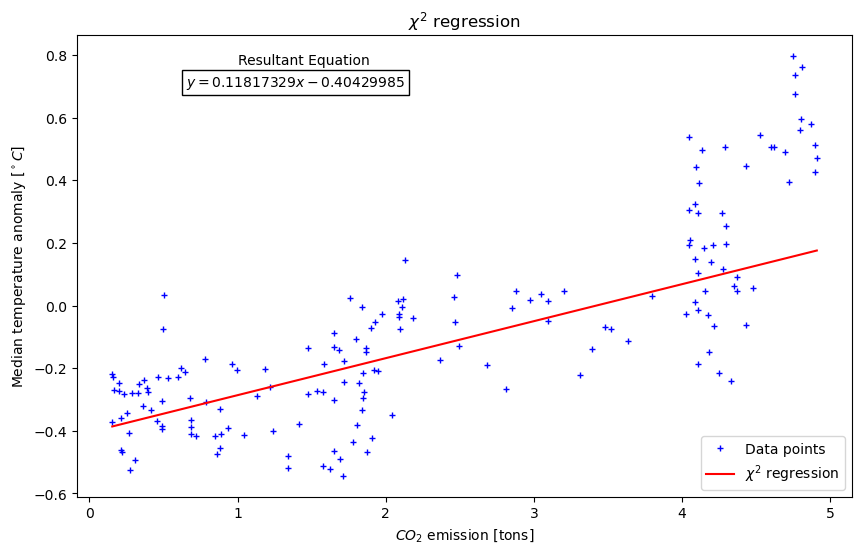

In [46]:
#Env 

plt.figure(figsize=(10, 6))

plt.plot(sorted_x, sorted_y, linestyle=' ', color = 'blue', marker = '+', markersize = 4, label = "Data points")
plt.plot(sorted_x, fitted_mean_temp2, linestyle='-', color='red', label = r'$\chi^2$ regression')

bbox_props = dict(boxstyle='square,pad=0.3', facecolor='white', edgecolor='black', linewidth=1)
plt.text(1, 0.77, "Resultant Equation", fontsize=10, color='black')
plt.text(0.65, 0.7, r"$y = 0.11817329 x  -0.40429985$", fontsize=10, color='black', bbox=bbox_props)

plt.title(r"$\chi^2$ regression")
plt.legend(loc= 4)

plt.xlabel(r"$CO_2$ emission [tons]")
plt.ylabel(r"Median temperature anomaly [$^\circ C$]")

plt.show()

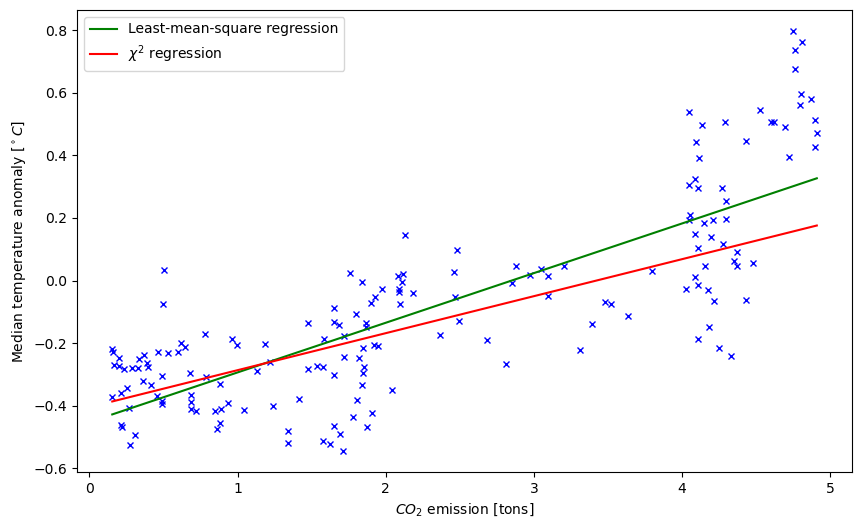

In [47]:
plt.figure(figsize=(10, 6))

plt.plot(sorted_x, sorted_y, linestyle=' ', color = 'blue', marker = 'x', markersize = 4)
plt.plot(sorted_x, fitted_mean_temp1, linestyle='-', color='green', label = "Least-mean-square regression")
plt.plot(sorted_x, fitted_mean_temp2, linestyle='-', color='red', label = r'$\chi^2$ regression')

#plt.errorbar(sorted_x, sorted_y, yerr = sorted_errors, linestyle = ' ',
 #          marker = "+", color = "red", alpha = 0.6)
    
plt.legend(loc='best')

plt.xlabel(r"$CO_2$ emission [tons]")
plt.ylabel(r"Median temperature anomaly [$^\circ C$]")

plt.show()


(f) Now, try to improve the fits. The temperature anomaly data are noisy as a result of climate variability.


- Make it smoother by: interpolating it into a finer x-axis and applying a Gaussian filter. Show the comparison in a figure.


- Re-do the analysis in (e), using the smoothed data for the temperature anomaly.


- Is a single line a good model? If not, carry out a piece-wise analysis if necessary and report the new equations and plots.

In [48]:
import scipy.interpolate as interp
from scipy.interpolate import UnivariateSpline

In [49]:
# Sort the up_bound and low_bound arrays
sorted_up_bound = up_bound[indices_sort]
sorted_low_bound = low_bound[indices_sort]

In [50]:
# Create the interpolation functions
f_cubic = UnivariateSpline(sorted_x, sorted_y, k = 3, s = 0.5)
up_bound_interp = UnivariateSpline(sorted_x, sorted_up_bound, k = 3, s = 0.5)
low_bound_interp = UnivariateSpline(sorted_x, sorted_low_bound, k = 3, s = 0.5)

In [51]:
# Create a new x array
x_new = np.linspace(sorted_x.min(), sorted_x.max(), 200)

# Compute the new y values
temp_new = f_cubic(x_new)
up_bound_new = up_bound_interp(x_new)
low_bound_new = low_bound_interp(x_new)

In [52]:
# Apply Gaussian filter

from scipy.ndimage import gaussian_filter 

# Apply the filter
smooth_temp = gaussian_filter(temp_new, sigma = 2)
smooth_up_bound = gaussian_filter(up_bound_new, sigma =2)
smooth_low_bound = gaussian_filter(low_bound_new, sigma =2) 

In [53]:
# Compute the errors 
error_array2 = error(smooth_up_bound, smooth_low_bound, smooth_temp)

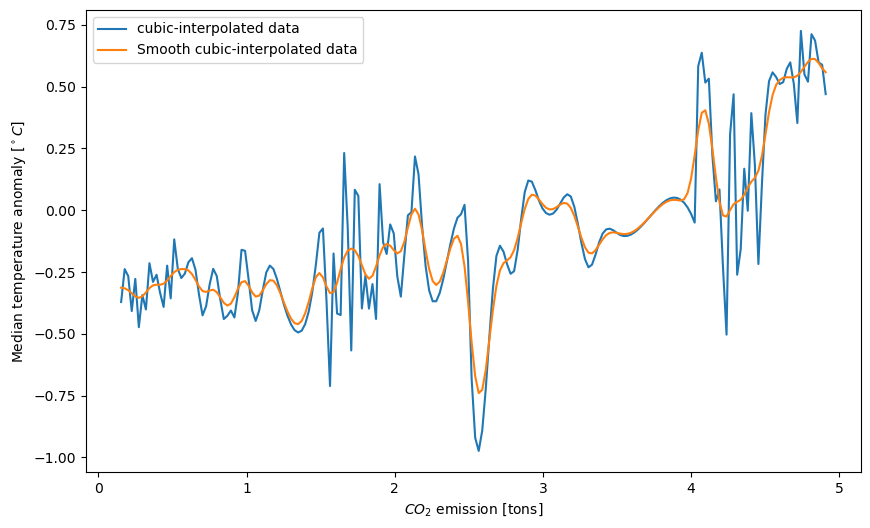

In [54]:
# Plot sorted data.
# Env 

plt.figure(figsize=(10, 6))
plt.plot(x_new, temp_new, label = 'cubic-interpolated data')

plt.plot(x_new, smooth_temp, label = 'Smooth cubic-interpolated data')


plt.xlabel(r"$CO_2$ emission [tons]")
plt.ylabel(r"Median temperature anomaly [$^\circ C$]")

plt.legend(loc='best')

plt.show()

In [55]:
# New analysis LM regression 
coef, cova = opt.curve_fit(fit_model1, x_new, smooth_temp)

# Compute the mean t using the fitted parameters 
fitted_mean_temp3 = fit_model1(x_new, *coef)

print(coef[0], coef[1])

0.15764628529399055 -0.5050376543612737


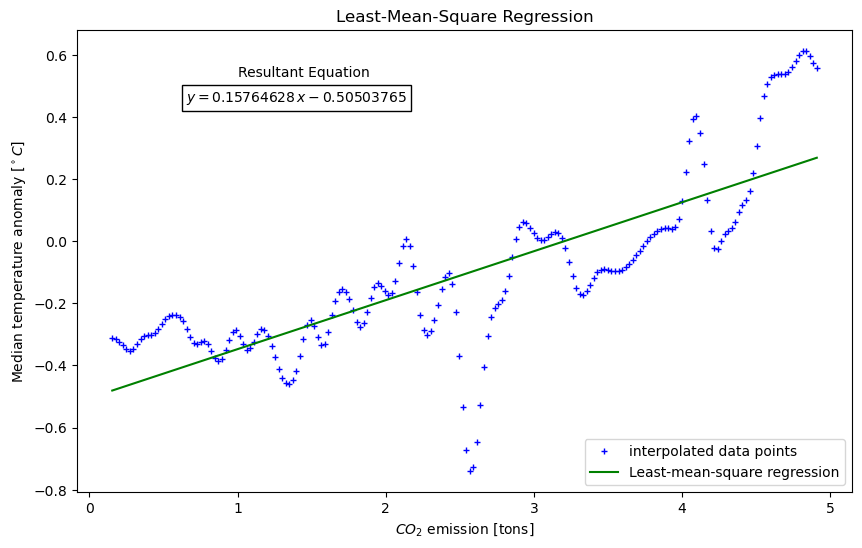

In [56]:
plt.figure(figsize=(10, 6))

plt.plot(x_new, smooth_temp, linestyle=' ', color = 'blue', marker = '+', markersize = 4, label = 'interpolated data points')
plt.plot(x_new, fitted_mean_temp3, linestyle='-', color='green', label = 'Least-mean-square regression')
#plt.plot(sorted_x, fitted_mean_t, linestyle='-', color='green', label = 'Least-mean-square regression')


bbox_props = dict(boxstyle='square,pad=0.3', facecolor='white', edgecolor='black', linewidth=1)
plt.text(1, 0.53, "Resultant Equation", fontsize=10, color='black')
plt.text(0.65, 0.45, r"$y = 0.15764628\,x -0.50503765$", fontsize=10, color='black', bbox=bbox_props)


plt.title('Least-Mean-Square Regression')
plt.legend(loc=4)

plt.xlabel(r"$CO_2$ emission [tons]")
plt.ylabel(r"Median temperature anomaly [$^\circ C$]")

plt.show()

In [57]:
# Chi sqr regression 

def chi_sqr_function(params):
    """
    """
    m, b = params 
    model = m * x_new + b
    chisqr = np.sum((smooth_temp - model)**2 / (error_array2)**2)
    return chisqr 

In [58]:

initial_params2 = [1, 1]

# minimisation 
result_2 = opt.minimize(chi_sqr_function, initial_params2)

# Get the optimised parameters 
optimised_params2 = result_2.x
print("Optimised parameters: ", optimised_params2)


Optimised parameters:  [ 0.13724182 -0.49027403]


In [59]:
fitted_mean_temp4 = fit_model1(x_new, *optimised_params2)

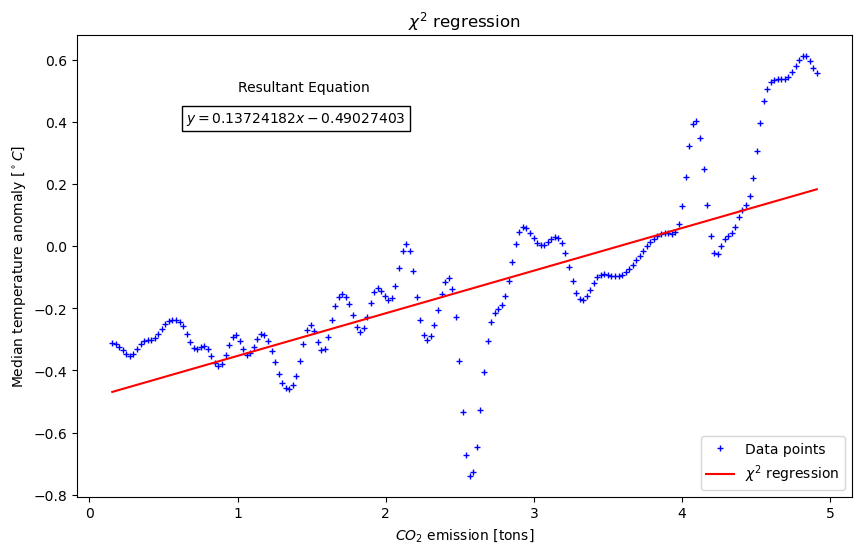

In [60]:
plt.figure(figsize=(10, 6))

plt.plot(x_new, smooth_temp, linestyle=' ', color = 'blue', marker = '+', markersize = 4, label = "Data points")
plt.plot(x_new, fitted_mean_temp4, linestyle='-', color='red', label = r'$\chi^2$ regression')


bbox_props = dict(boxstyle='square,pad=0.3', facecolor='white', edgecolor='black', linewidth=1)
plt.text(1, 0.5, "Resultant Equation", fontsize=10, color='black')
plt.text(0.65, 0.4, r"$y = 0.13724182 x  -0.49027403$", fontsize=10, color='black', bbox=bbox_props)

plt.title(r"$\chi^2$ regression")
plt.legend(loc= 4)

plt.xlabel(r"$CO_2$ emission [tons]")
plt.ylabel(r"Median temperature anomaly [$^\circ C$]")

plt.show()

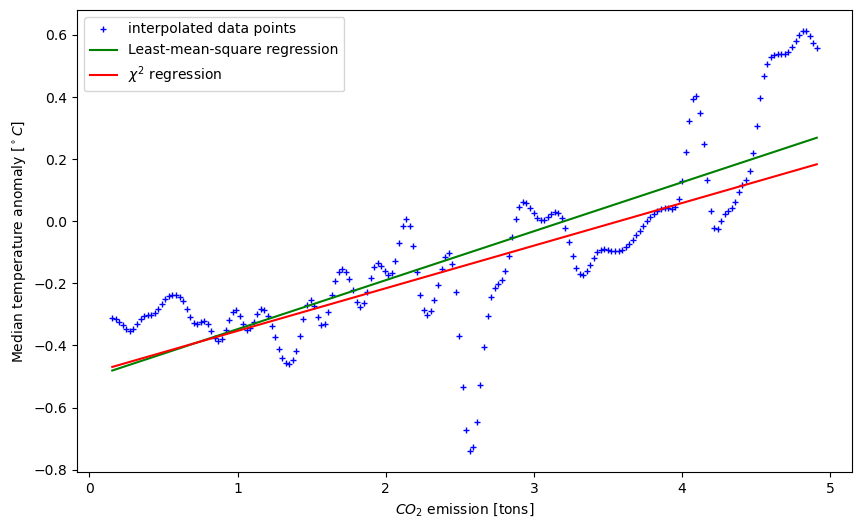

In [61]:
# Plotting the tho new results of the analysis

# Plot sorted data.
#Env 

plt.figure(figsize=(10, 6))

plt.plot(x_new, smooth_temp, linestyle=' ', color = 'blue', marker = '+', markersize = 4, label = 'interpolated data points')
plt.plot(x_new, fitted_mean_temp3, linestyle='-', color='green', label = 'Least-mean-square regression')
plt.plot(x_new, fitted_mean_temp4, linestyle='-', color='red', label = r'$\chi^2$ regression')

#plt.errorbar(sorted_x, sorted_y, yerr = sorted_errors, linestyle = ' ',
 #          marker = "+", color = "red", alpha = 0.6)
    
plt.legend(loc='best')

plt.xlabel(r"$CO_2$ emission [tons]")
plt.ylabel(r"Median temperature anomaly [$^\circ C$]")

plt.show()

In [62]:
x_1 = x_new[x_new <= 2.5]
x_2 = x_new[x_new > 2.5]

print(x_1.shape)

(99,)


In [63]:
y_1 = []
y_2 = []
error_1 = []
error_2 = []

# Loop
for i in range(0, len(x_1)):
    y_1.append(smooth_temp[i])
    error_1.append(error_array2[i])
for i in range(99, len(x_new)):
    y_2.append(smooth_temp[i])
    error_2.append(error_array2[i])
    
y_1 = np.array(y_1)
y_2 = np.array(y_2)
error_1 = np.array(error_1)
error_2 = np.array(error_2)


In [64]:
# Chi sqr method 
def chi_sqr_function2(params):
    """
    """
    m, b = params 
    model = m * x_1 + b
    chisqr = np.sum((y_1 - model)**2 / (error_1)**2)
    return chisqr 

In [65]:
def chi_sqr_function3(params):
    """
    """
    m, b = params 
    model = m * x_2 + b
    chisqr = np.sum((y_2 - model)**2 / (error_2)**2)
    return chisqr 

In [66]:
# First half of the data 
result3 = opt.minimize(chi_sqr_function2, initial_params2)
optimised_params3 = result3.x 

# second half of the data 
result4 = opt.minimize(chi_sqr_function3, initial_params2)
optimised_params4 = result4.x 

In [67]:
fitted_mean_temp5 = fit_model1(x_1, *optimised_params3)
fitted_mean_temp6 = fit_model1(x_2, *optimised_params4)

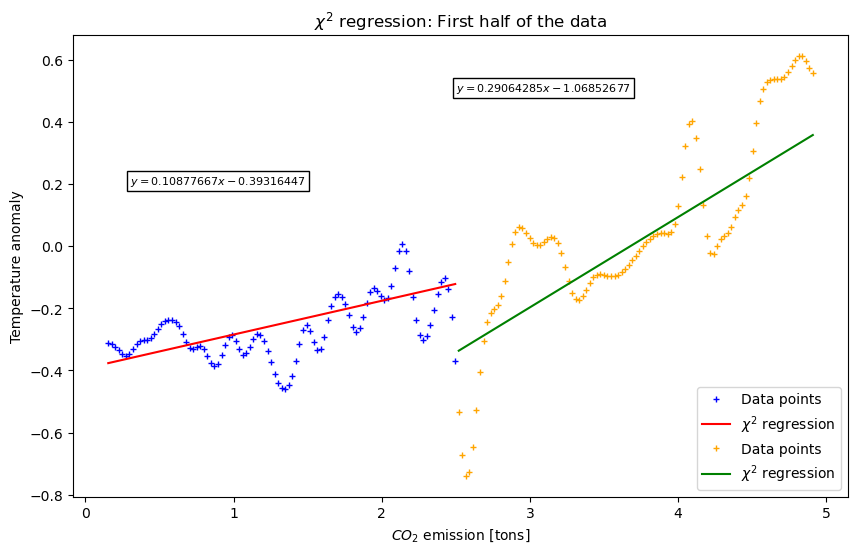

In [69]:
# Plotting
#Env 

plt.figure(figsize=(10, 6))

plt.plot(x_1, y_1, linestyle=' ', color = 'blue', marker = '+', markersize = 4, label = "Data points")
plt.plot(x_1, fitted_mean_temp5, linestyle='-', color='red', label = r'$\chi^2$ regression')


plt.plot(x_2, y_2, linestyle=' ', color = 'orange', marker = '+', markersize = 4, label = "Data points")
plt.plot(x_2, fitted_mean_temp6, linestyle='-', color='green', label = r'$\chi^2$ regression')

bbox_props = dict(boxstyle='square,pad=0.3', facecolor='white', edgecolor='black', linewidth=1)
plt.text(0.3, 0.2,r"$y =0.10877667 x  -0.39316447$", fontsize=8, color='black', bbox=bbox_props)

bbox_props = dict(boxstyle='square,pad=0.3', facecolor='white', edgecolor='black', linewidth=1)
plt.text(2.5, 0.5,r"$y =0.29064285 x -1.06852677$", fontsize = 8, color='black', bbox=bbox_props)


plt.title(r"$\chi^2$ regression: First half of the data")
plt.legend(loc= 4)

plt.xlabel(r"$CO_2$ emission [tons]")
plt.ylabel(r"Temperature anomaly")

plt.show()

In [ ]:
# Do not forget to comment the results.